#Importation des données

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Jedha_Fullstack/Projet_Final/df_clean.csv')
df

Output hidden; open in https://colab.research.google.com to view.

#Prétraitement des descriptions de postes

In [ ]:
job_class_list = df['job_class'].unique().tolist()
len(job_class_list)

16

In [ ]:
df['job_company'] = df['job_company'].str.replace(r"\s+", " ")
company_names_list = df['job_company'].str.lower().apply(lambda x: x[:-1] if isinstance(x, str) else x).unique().tolist()

<ipython-input-150-95afad6f118d>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
stop_words = job_class_list + company_names_list
len(stop_words)

2492

In [ ]:
df['job_description_2'] = df['job_description'].str.lower()
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez cgi, lea..."
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati..."
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,"crédit agricole consumer finance, filiale à 10..."


In [ ]:
#Choix de retirer des descriptions les intitulés de postes et les noms des sociétés quand ils y sont mentionnés afin de ne pas reproduire
#le biais de l'intitulé de poste inapproprié au regard de la description associée, c'est à dire notre postulat de départ

import re

pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, map(str, stop_words))))
df['job_description_2'] = df['job_description_2'].str.replace(pattern, '', regex=True)
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ..."
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati..."
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc..."


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['clean_text'] = df['job_description_2'].astype(str).apply(remove_emoji)
df['clean_text'] = df['clean_text'].replace(r"[^a-zA-Z0-9\s]", " ")
df['clean_text'] = df['clean_text'].apply(lambda x: ''.join(elt for elt in x if elt.isalnum() or elt==" "))
df['clean_text'] = df['clean_text'].replace(r"\s+", " ")
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
df['clean_text'][:5]

0    manager data description de postechez leader m...
1    nous sommes une esn agile un groupe internatio...
2     filiale à 100 du est un acteur de référence s...
3    spécialiste de la production damendements de s...
4    chez nous sommes convaincus que vous êtes le m...
Name: clean_text, dtype: object

In [ ]:
!pip install spacy -q

In [ ]:
import spacy
import spacy.lang.fr
from spacy.lang.fr.stop_words import STOP_WORDS

In [ ]:
!python -m spacy download fr_core_news_md -q

2023-06-29 14:39:02.515720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 5.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [ ]:
import fr_core_news_md
nlp = spacy.load('fr_core_news_md')

#Tokenisation

In [ ]:
%%time

df['tokens'] = df['job_description_2'].apply(lambda x: [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])

CPU times: user 15min 5s, sys: 1.98 s, total: 15min 7s
Wall time: 15min 33s


In [ ]:
#Sauvegarde des descriptions tokenisées pour ne pas devoir réiterer l'opération coûteuse en temps si besoin de modification ultérieures
#sur les données

df.to_csv('df_tkn.csv', index=False)

In [ ]:
df['clean_text'] = df['tokens'].apply(lambda txt: ' '.join(txt).replace(",", ""))
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2,clean_text,tokens
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ...",manager dater description postechez leader mo...,"[manager, dater, description, postechez, ,, le..."
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati...",être esn agile groupe international certifier...,"[être, esn, agile, ,, groupe, international, c..."
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc...",filiale 100 pourcent acteur référence marché...,"[,, filiale, 100, pourcent, ,, acteur, référen..."


#Vectorisation

In [ ]:
#Vectorisation TF-IDF avec suppression des mots trop communs à toutes les offres pour permettre une clusterisation pertinente

from sklearn.feature_extraction.text import TfidfVectorizer

irrelevant_words = ['être', 'métier', 'données', 'data', 'dater', 'poste', 'donnée', 'avoir', 'bon', 'dune', 'decathlon', 'leroy', 'sport', 'client', 'equipe',
                    'équipe', 'projet', 'dun', 'dune', 'sportif', 'produit', 'lille', 'digital', 'plaisir', 'large', 'envie', 'bienfait', 'software', 'choix',
                    'sup', 'letat', 'vinci', 'diplômant', 'school', 'niveau', 'bachelor', 'alternance', 'formation', 'lier', 'mission', 'service', 'expérience',
                    'travail', 'groupe']

vectorizer = TfidfVectorizer(stop_words=irrelevant_words)
X = df['clean_text']
vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

In [ ]:
X_tfidf.shape

(8031, 45950)

In [ ]:
X_tfidf[0]

<1x45950 sparse matrix of type '<class 'numpy.float64'>'
	with 264 stored elements in Compressed Sparse Row format>

#Clusterisation KMeans

In [ ]:
#Détermination empirique d'un optimum à 3 clusters

from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
df['cluster'] = kmeans.labels_
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2,clean_text,tokens,cluster
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ...",manager dater description postechez leader mo...,"[manager, dater, description, postechez, ,, le...",1
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati...",être esn agile groupe international certifier...,"[être, esn, agile, ,, groupe, international, c...",2
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc...",filiale 100 pourcent acteur référence marché...,"[,, filiale, 100, pourcent, ,, acteur, référen...",0


#Analyse et visualisations des clusters obtenus

In [ ]:
df['cluster'].value_counts()

0    4205
2    3071
1     755
Name: cluster, dtype: int64

In [ ]:
centroids = kmeans.cluster_centers_
centroids.shape

(3, 45950)

In [ ]:
#Tri des indices par importance dans le but de visualiser ensuite les mots-clés par cluster

top_terms_indices = centroids.argsort()[:, ::-1]
top_terms_indices.shape

(3, 45950)

In [ ]:
#Observations des mots-clés discriminant chaque cluster

import numpy as np

terms = vectorizer.get_feature_names_out()
top_terms_per_cluster = [[terms[i] for i in cluster_indice] for cluster_indice in top_terms_indices]

top_terms = 10

cluster_keywords = []
for i, terms_cluster in enumerate(top_terms_per_cluster):
    top_terms_cluster = terms_cluster[:top_terms]
    cluster_keywords.append({"cluster": i, "offers_nb": np.count_nonzero(df['cluster'] == i)  , "keywords": ', '.join(top_terms_cluster)})

cluster_keywords

[{'cluster': 0,
  'offers_nb': 4205,
  'keywords': 'analyse, outil, marketing, entreprise, gestion, qualité, connaissance, commercial, direction, sur'},
 {'cluster': 1,
  'offers_nb': 755,
  'keywords': 'conseil, cabinet, transformation, consultant, rejoindre, entreprise, développement, grand, accompagner, technologie'},
 {'cluster': 2,
  'offers_nb': 3071,
  'keywords': 'technique, développement, solution, cloud, sur, compétence, environnement, entreprise, architecture, connaissance'}]

In [ ]:
#Réduction de dimension par TruncatedSVD afin de visualiser en trois dimensions les descriptions de postes et les clusters qui en résultent

from sklearn.decomposition import TruncatedSVD
import plotly.graph_objects as go

svd = TruncatedSVD(n_components=3)
X_3d = svd.fit_transform(X_tfidf)

scatter3d_trace = go.Scatter3d(
    x=X_3d[:, 0],
    y=X_3d[:, 1],
    z=X_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=kmeans.labels_,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='Clusters'
        )
    ),
    name='Cluster'
)

fig = go.Figure(data=[scatter3d_trace])
fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    title='Visualisation des clusters en 3D'
)

fig.show()

In [ ]:
#Création de "sous-dataframes" par cluster afin de pouvoir analyser facilement chaque cluster ensuite

clusters_dic = {}

for i in range(n_clusters):
    clusters_dic[f'df_cluster_{i}'] = df.loc[df['cluster'] == i]

In [ ]:
#Analyse de la composition de chaque cluster en termes de classes d'intitulés de postes représentés

clusters_dic['df_cluster_0']["job_class"].value_counts()[:10]

Data/BI Analyst              1189
Data Engineer                 453
Data Scientist                425
Consultant                    279
Product Owner/Manager         237
Pôle commercial/marketing     235
Gestionnaire Data             230
Data Manager                  229
Chef de projet                207
Autres                        194
Name: job_class, dtype: int64

In [ ]:
clusters_dic['df_cluster_1']["job_class"].value_counts()[:10]

Consultant               233
Data/BI Analyst          112
Pôle finance/HR           95
Data Engineer             80
Data Scientist            50
Data Architect            45
Développeur               37
Data Manager              35
Product Owner/Manager     25
Chef de projet            12
Name: job_class, dtype: int64

In [ ]:
clusters_dic['df_cluster_2']["job_class"].value_counts()[:10]

Data Engineer                     1114
Développeur                        632
Data Architect                     365
Data/BI Analyst                    322
Data Scientist                     170
Product Owner/Manager              102
Consultant                          89
Data Manager                        62
Business Analyst                    60
Technicien/Administrateur Data      47
Name: job_class, dtype: int64

In [ ]:
#Analyse de la composition de chaque cluster en termes de skills mentionnés

all_skills_0 = clusters_dic['df_cluster_0']["skills"].str.cat(sep=' ')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
skill_counts_0 = vectorizer.fit_transform([all_skills_0])
skills_0 = vectorizer.get_feature_names_out()
skill_freq_0 = skill_counts_0.sum(axis=0).A1
skill_freq_0_df = pd.DataFrame({'skill': skills_0, 'frequency': skill_freq_0})
top_skills_0 = skill_freq_0_df.sort_values(by='frequency', ascending=False)
top_skills_0['skill'] = top_skills_0['skill'].replace({"bi": "power bi", "power": "power bi"}) #regroupement de "power" et "bi" en un unique skill
top_skills_0['skill'] = top_skills_0['skill'].replace("unkwown", "unknown")
top_skills_0 = top_skills_0[top_skills_0['skill'] != 'git'] #suppression de "git" pour faciliter la visualisation
top_skills_0 = top_skills_0[~top_skills_0['skill'].duplicated()]
print(top_skills_0[:10])

         skill  frequency
10       excel       1642
42         sql       1218
31      python        997
44     tableau        970
35         sas        842
28    power bi        543
7    dashboard        375
34         sap        332
29  powerpoint        250
46         vba        213


In [ ]:
all_skills_1 = clusters_dic['df_cluster_1']["skills"].str.cat(sep=' ')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
skill_counts_1 = vectorizer.fit_transform([all_skills_1])
skills_1 = vectorizer.get_feature_names_out()
skill_freq_1 = skill_counts_1.sum(axis=0).A1
skill_freq_1_df = pd.DataFrame({'skill': skills_1, 'frequency': skill_freq_1})
top_skills_1 = skill_freq_1_df.sort_values(by='frequency', ascending=False)
top_skills_1['skill'] = top_skills_1['skill'].replace({"bi": "power bi", "power": "power bi"})
top_skills_1['skill'] = top_skills_1['skill'].replace("unkwown", "unknown")
top_skills_1 = top_skills_1[~top_skills_1['skill'].duplicated()]
top_skills_1 = top_skills_1[top_skills_1['skill'] != 'git']
print(top_skills_1[:10])

       skill  frequency
10     excel        507
41   tableau        195
39       sql        167
29    python        162
2        aws        109
3      azure        100
11       gcp         87
4   power bi         83
38     spark         82
14      java         75


In [ ]:
all_skills_2 = clusters_dic['df_cluster_2']["skills"].str.cat(sep=' ')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
skill_counts_2 = vectorizer.fit_transform([all_skills_2])
skills_2 = vectorizer.get_feature_names_out()
skill_freq_2 = skill_counts_2.sum(axis=0).A1
skill_freq_2_df = pd.DataFrame({'skill': skills_2, 'frequency': skill_freq_2})
top_skills_2 = skill_freq_2_df.sort_values(by='frequency', ascending=False)
top_skills_2['skill'] = top_skills_2['skill'].replace({"bi": "power bi", "power": "power bi"})
top_skills_2['skill'] = top_skills_2['skill'].replace("unkwown", "unknown")
top_skills_2 = top_skills_2[~top_skills_2['skill'].duplicated()]
top_skills_2 = top_skills_2[top_skills_2['skill'] != 'git']
print(top_skills_2[:10])

         skill  frequency
42         sql       1659
31      python       1118
15        java        836
3        azure        632
2          aws        581
10       excel        565
9       docker        539
41       spark        534
18  kubernetes        433
36       scala        411


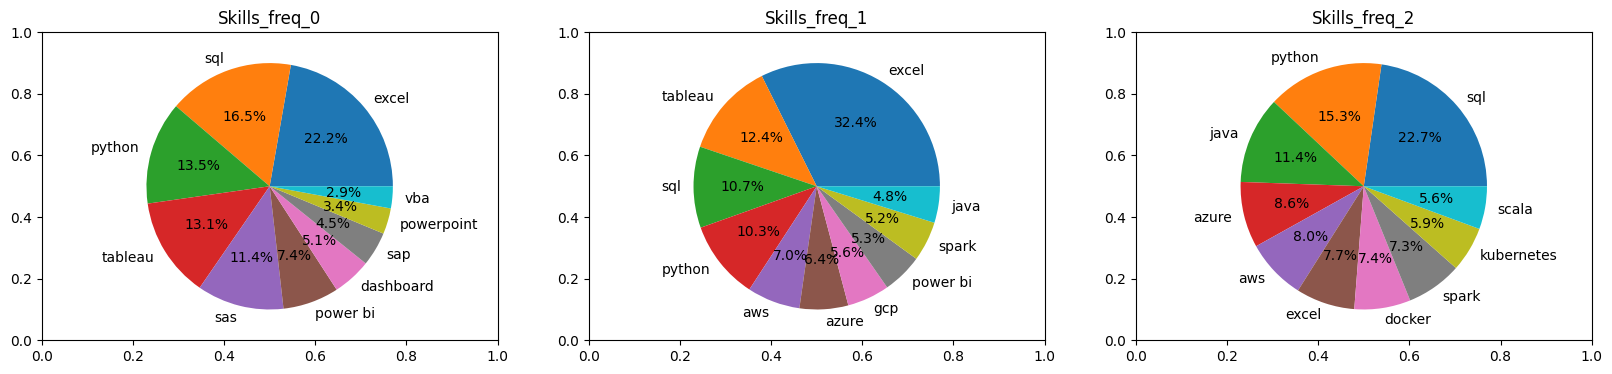

In [ ]:
#Visualisation de la répartition des skills mentionnés par cluster

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.pie(top_skills_0['frequency'][:10], labels=top_skills_0['skill'][:10], autopct='%1.1f%%')
ax1.set_title('Skills_freq_0')

ax2 = fig.add_subplot(1, 3, 2)
ax2.pie(top_skills_1['frequency'][:10], labels=top_skills_1['skill'][:10], autopct='%1.1f%%')
ax2.set_title('Skills_freq_1')

ax3 = fig.add_subplot(1, 3, 3)
ax3.pie(top_skills_2['frequency'][:10], labels=top_skills_2['skill'][:10], autopct='%1.1f%%')
ax3.set_title('Skills_freq_2')

plt.show()

In [ ]:
#Renommage des clusters après interprétation grâce aux mots-clés, à la composition en termes de classes d'intitulé de poste et à la
#composition en termes de skills mentionnés dans la description du poste

cluster_names = {0 : "Engineering, Data Environment", 1 : "Data Analyse, Data Science", 2 : "Consulting"}

df['cluster'] = df['cluster'].map(cluster_names).fillna(df['cluster'])
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2,clean_text,tokens,cluster
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ...",manager dater description postechez leader mo...,"[manager, dater, description, postechez, ,, le...","Data Analyse, Data Science"
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati...",être esn agile groupe international certifier...,"[être, esn, agile, ,, groupe, international, c...",Consulting
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc...",filiale 100 pourcent acteur référence marché...,"[,, filiale, 100, pourcent, ,, acteur, référen...","Engineering, Data Environment"


#Wordclouds

In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import STOPWORDS

In [ ]:
#Création de wordclouds représentant chaque cluster à des fins d'illustration dans l'application Streamlit finale avec suppression des mots
#n'apportant pas de valeur ajoutée dans l'interprétation de chaque cluster

custom_stopwords_1 = ["groupe", "mise", "place", "l", "métier", "gestion", "technique", "activité", "client", "nouveau", "informatique", "développement", 'technologie',
                      "travailler", "sein", "participer", "développer", "mettre", "test", "connaissance", "outil", "collaborateur", "solution", "accompagner", "bac", "agile",
                      "rejoindre", "qualité", "python", "compétence", "fort", "faire", "profil", "cest", "rechercher"]

stopwords_1 = set(STOPWORDS.union(custom_stopwords_1))

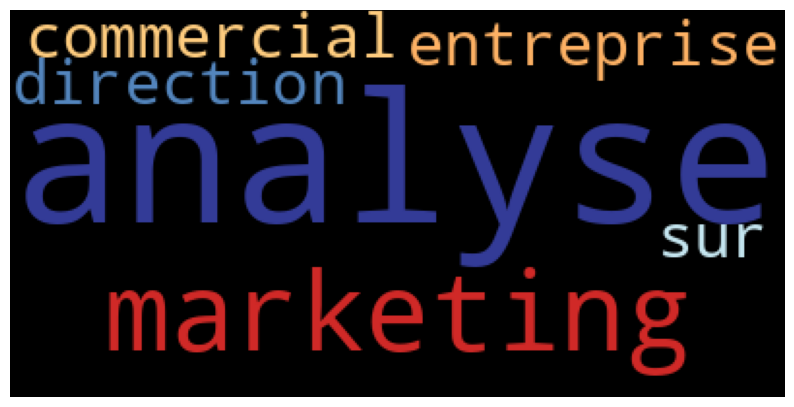

In [ ]:
mask = None
colormap = 'RdYlBu'
min_font_size = 10
max_font_size = 100

wd_1 = wordcloud.WordCloud(background_color=None, contour_width=1, contour_color='steelblue', stopwords=stopwords_1, max_words=10, colormap=colormap, mask=mask,
                         min_font_size=min_font_size, max_font_size=max_font_size, prefer_horizontal=1)
# text = ' '.join(cluster_keywords[0]['keywords'])
cloud = wd_1.generate(cluster_keywords[0]['keywords'])
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [ ]:
#Enregistrement des wordclouds pour leur utilisation ultérieure dans l'application Streamlit

wd_1.to_file("wordcloud1.png")

In [ ]:
custom_stopwords_2 = ["groupe", "mise", "place", "l", "métier", "gestion", "technique", "activité", "client", "nouveau", "informatique", "développement", 'technologie',
                      "travailler", "sein", "participer", "développer", "mettre", "test", "commercial", "qualité", "marketing"]

stopwords_2 = set(STOPWORDS.union(custom_stopwords_2))

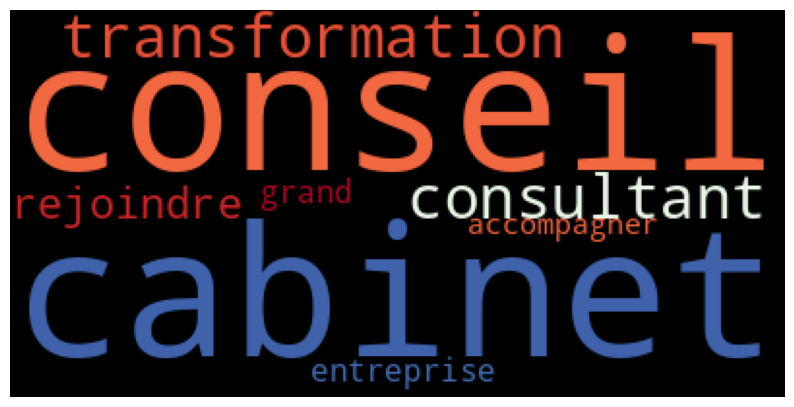

In [ ]:
mask = None
colormap = 'RdYlBu'
min_font_size = 10
max_font_size = 100

wd_2 = wordcloud.WordCloud(background_color=None, contour_width=1, contour_color='steelblue', stopwords=stopwords_2, max_words=10, colormap=colormap, mask=mask,
                         min_font_size=min_font_size, max_font_size=max_font_size, prefer_horizontal=1)
# text = ' '.join(cluster_keywords[0]['keywords'])
cloud = wd_2.generate(cluster_keywords[1]['keywords'])
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [ ]:
wd_2.to_file("wordcloud2.png")

In [ ]:
custom_stopwords_3 = ["groupe", "mise", "place", "l", "métier", "gestion", "technique", "activité", "client", "nouveau", "informatique", "développement", 'technologie',
                      "travailler", "sein", "participer", "développer", "mettre", "test", "commercial", "entreprise", "transformation", "grand", "rejoindre"]

stopwords_3 = set(STOPWORDS.union(custom_stopwords_3))

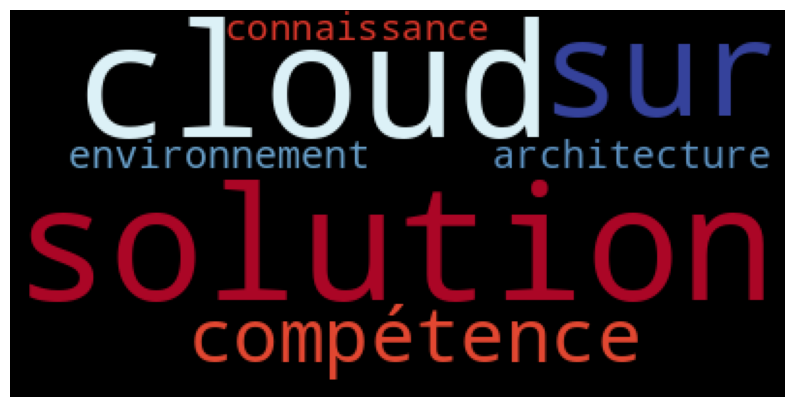

In [ ]:
mask = None
colormap = 'RdYlBu'
min_font_size = 10
max_font_size = 100

wd_3 = wordcloud.WordCloud(background_color=None, contour_width=1, contour_color='steelblue', stopwords=stopwords_3, prefer_horizontal=1, max_words=10, colormap=colormap, mask=mask,
                         min_font_size=min_font_size, max_font_size=max_font_size)
# text = ' '.join(cluster_keywords[0]['keywords'])
cloud = wd_3.generate(cluster_keywords[2]['keywords'])
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [ ]:
wd_3.to_file("wordcloud3.png")